### Step 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mc.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [7]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

### Step 2

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Genre']= label_encoder.fit_transform(df['Genre'])
df['Genre'].unique()

array([1, 0])

### Step 3

In [10]:
df.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [12]:
df.var()

CustomerID                3350.000000
Genre                        0.247638
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [13]:
df.corr()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Genre,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


### Step 4

In [14]:
df.skew()

CustomerID                0.000000
Genre                     0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [15]:
df.sort_values(by =['Genre','Age','Annual Income (k$)','Spending Score (1-100)'])

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
114,115,0,18,65,48
111,112,0,19,63,54
115,116,0,19,65,50
2,3,0,20,16,6
39,40,0,20,37,75
...,...,...,...,...,...
102,103,1,67,62,59
108,109,1,68,63,43
57,58,1,69,44,46
60,61,1,70,46,56


### Step 5

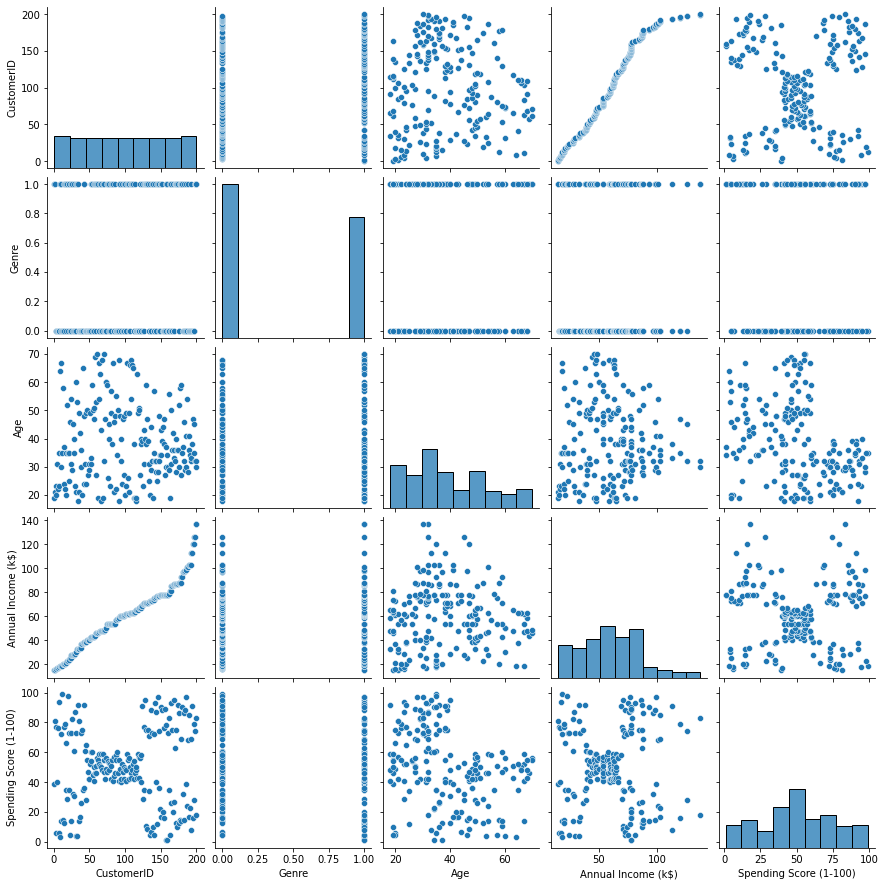

In [16]:
sns.pairplot(data=df)

### Step 6

In [17]:
from sklearn.cluster import KMeans

In [18]:
df.drop(['CustomerID'],axis=1, inplace=True)

In [19]:
KM = KMeans(n_clusters=5)

In [20]:
KM.fit(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [21]:
KM.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [22]:
print(KM.cluster_centers_)

[[ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.4125     42.9375     55.0875     49.7125    ]
 [ 0.52777778 40.66666667 87.75       17.58333333]
 [ 0.40909091 25.27272727 25.72727273 79.36363636]
 [ 0.39130435 45.2173913  26.30434783 20.91304348]]


### Step 7

In [24]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

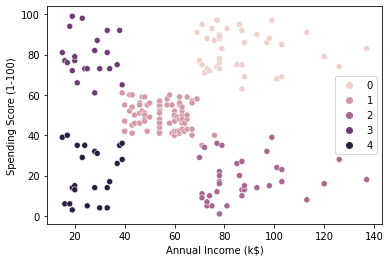

In [25]:
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=KM.labels_)

### Step 8

In [26]:
kmeans2 = KMeans(n_clusters = 5, init='k-means++')
kmeans2.fit(df)
pred = kmeans2.predict(df)

In [27]:
frame = pd.DataFrame(df)
frame['cluster'] = pred

In [28]:
frame.cluster.value_counts()

2    80
3    39
0    36
4    23
1    22
Name: cluster, dtype: int64

In [29]:
frame

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,4
1,1,21,15,81,1
2,0,20,16,6,4
3,0,23,16,77,1
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,0
197,1,32,126,74,3
198,1,32,137,18,0


In [30]:
C0 = df[df['cluster'] == 0]
C1 = df[df['cluster'] == 1]
C2 = df[df['cluster'] == 2]
C3 = df[df['cluster'] == 3]
C4 = df[df['cluster'] == 4]

In [31]:
import statistics as ss
print('Average Age : ',C0['Age'].mean())
print('Average Annual Income : ',C0['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C0['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C0.shape)
print('From those Customers We have',C0.Genre.value_counts()[1],'male and',C0.Genre.value_counts()[1])

Average Age :  40.666666666666664
Average Annual Income :  87.75
Deviation of the mean for annual Income :  16.387059354433127
No. of Customers ie shape : (36, 5)
From those Customers We have 19 male and 19


In [33]:
print('Average Age : ',C1['Age'].mean())
print('Average Annual Income : ',C1['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C1['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C1.shape)
print('From those Customers We have',C1.Genre.value_counts()[1],'male and',C1.Genre.value_counts()[1])

Average Age :  25.272727272727273
Average Annual Income :  25.727272727272727
Deviation of the mean for annual Income :  7.566730552584204
No. of Customers ie shape : (22, 5)
From those Customers We have 9 male and 9


In [34]:
print('Average Age : ',C2['Age'].mean())
print('Average Annual Income : ',C2['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C2['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C2.shape)
print('From those Customers We have',C2.Genre.value_counts()[1],'male and',C2.Genre.value_counts()[1])

Average Age :  42.9375
Average Annual Income :  55.0875
Deviation of the mean for annual Income :  8.844928103978967
No. of Customers ie shape : (80, 5)
From those Customers We have 33 male and 33


In [35]:
print('Average Age : ',C3['Age'].mean())
print('Average Annual Income : ',C3['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C1['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C3.shape)
print('From those Customers We have',C3.Genre.value_counts()[1],'male and',C3.Genre.value_counts()[1])

Average Age :  32.69230769230769
Average Annual Income :  86.53846153846153
Deviation of the mean for annual Income :  7.566730552584204
No. of Customers ie shape : (39, 5)
From those Customers We have 18 male and 18


In [38]:
print('Average Age : ',C4['Age'].mean())
print('Average Annual Income : ',C4['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C4['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C4.shape)
print('From those Customers We have',C4.Genre.value_counts()[1],'male and',C4.Genre.value_counts()[0],'female')

Average Age :  45.21739130434783
Average Annual Income :  26.304347826086957
Deviation of the mean for annual Income :  7.893811054517766
No. of Customers ie shape : (23, 5)
From those Customers We have 9 male and 14 female


### Step 9

In [39]:
SSE = []
for clust in range(1,20):
  KM = KMeans(n_clusters= clust, init='k-means++')
  KM = KM.fit(df)
  SSE.append(KM.inertia_)

Text(0, 0.5, 'Inertia')

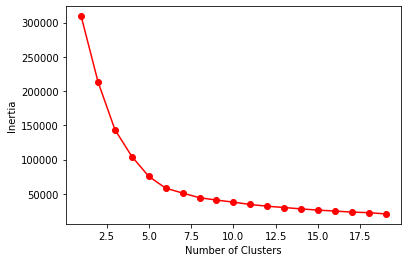

In [40]:
plt.plot(np.arange(1,20), SSE,'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

### Step 10

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2)
_PCA = pca.fit_transform(df)
PCA_Components = pd.DataFrame(_PCA)

In [43]:
PCA_Components

,0,1
0,-31.834500,-33.061505
1,0.819566,-56.816663
2,-57.392583,-13.213419
3,-2.116800,-53.455918
4,-32.141146,-30.450482
...,...,...
195,58.323076,31.054285
196,19.839326,66.489811
197,58.484056,38.382274
198,20.897502,79.420734


In [44]:
KM1 = KMeans(n_clusters=5)
KM1.fit(PCA_Components)
KM1.cluster_centers_

array([[ -4.40715908,  -3.10498363],
       [-10.26918248,  42.34855631],
       [ 41.55055719,   1.89493031],
       [-44.37392749, -10.12876457],
       [  5.03035686, -46.64467969]])

In [45]:
KM1.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

### Step 11

<AxesSubplot:xlabel='0', ylabel='1'>

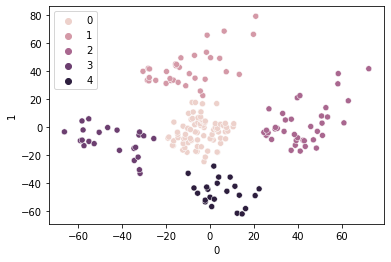

In [46]:
sns.scatterplot(PCA_Components[0], PCA_Components[1], hue=KM1.labels_)

### Step 12

In [47]:
from sklearn.cluster import MeanShift, AgglomerativeClustering

In [48]:
MS = MeanShift(bandwidth = 50)
MS.fit(PCA_Components)
MS.cluster_centers_

array([[ 0.35372711, -4.10489789]])

<AxesSubplot:xlabel='0', ylabel='1'>

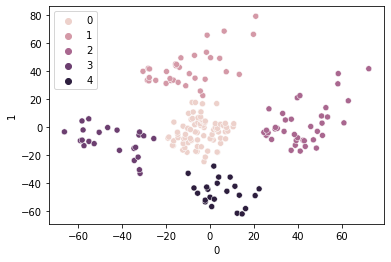

In [49]:
sns.scatterplot(PCA_Components[0], PCA_Components[1], hue=KM1.labels_)

### Step 13

In [50]:
AC = AgglomerativeClustering(n_clusters = 5, linkage='ward',compute_full_tree=True)
AC.fit(df)

AgglomerativeClustering(compute_full_tree=True, n_clusters=5)

In [51]:
AC.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [52]:
df['Cluster'] = AC.labels_

In [53]:
import scipy.cluster.hierarchy as sch

In [54]:
from scipy.cluster import hierarchy

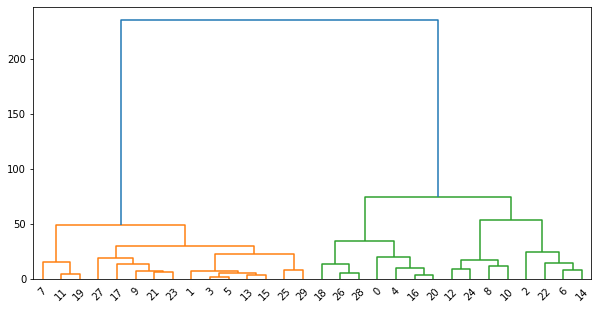

In [55]:
Z = hierarchy.linkage(df[:30], 'ward')
plt.figure(figsize=(10,5))
dn = hierarchy.dendrogram(Z)

### Step 14

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

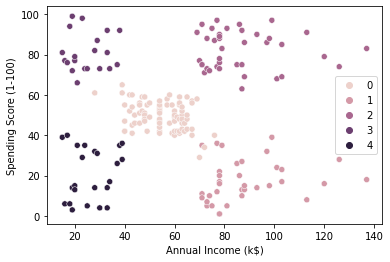

In [56]:
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=AC.labels_)